# **Tarea 4 - CC6205 Natural Language Processing 📚**

**Integrantes:** Sebastián Tinoco, José Luis Cádiz

**Fecha límite de entrega 📆:** Martes 14 de junio.

**Tiempo estimado de dedicación:** 6 horas

Bienvenid@s a la cuarta tarea del curso de Natural Language Processing (NLP). 
En esta tarea estaremos tratando el problema de **tagging** (generación de secuencias de etiquetas del mismo largo que la secuencia de input), el uso de **Convolutional Neural Networks** y **Recurrent Neural Networks**, e implementaremos una red usando PyTorch. 

Usen $\LaTeX$ para las fórmulas matemáticas. En la parte de programación pueden usar lo que quieran, pero la [Auxiliar 3](https://youtu.be/36WTXvg3zh0) les puede ser de *gran ayuda*.

**Instrucciones:**
- La tarea se realiza en grupos de **máximo** 2 personas. Puede ser invidivual pero no es recomendable.
- La entrega es a través de u-cursos a más tardar el día estipulado arriba. No se aceptan atrasos.
- El formato de entrega es este mismo Jupyter Notebook.
- Al momento de la revisión tu código será ejecutado. Por favor verifica que tu entrega no tenga errores de compilación.
- En el horario de auxiliar pueden realizar consultas acerca de la tarea a través del canal de Discord del curso.

Si aún no han visto las clases, se recomienda visitar los links de las referencias.

**Referencias:**

- [Tagging, and Hidden Markov Models ](http://www.cs.columbia.edu/~mcollins/cs4705-spring2019/slides/tagging.pdf) (slides by Michael Collins), [notes](http://www.cs.columbia.edu/~mcollins/hmms-spring2013.pdf), [video 1](https://youtu.be/-ngfOZz8yK0), [video 2](https://youtu.be/Tjgb-yQOg54), [video 3](https://youtu.be/aaa5Qoi8Vco), [video 4](https://youtu.be/4pKWIDkF_6Y)       
- [MEMMs and CRFs](https://github.com/dccuchile/CC6205/blob/master/slides/NLP-CRF.pdf): [notes 1](http://www.cs.columbia.edu/~mcollins/crf.pdf), [notes 2](http://www.cs.columbia.edu/~mcollins/fb.pdf), [video 1](https://youtu.be/qlI-4lSUDkg), [video 2](https://youtu.be/PLoLKQwkONw), [video 3](https://youtu.be/ZpUwDy6o28Y)
- [Convolutional Neural Networks](https://github.com/dccuchile/CC6205/blob/master/slides/NLP-CNN.pdf): [video](https://youtu.be/lLZW5Fn40r8)
- [Recurrent Neural Networks](https://github.com/dccuchile/CC6205/blob/master/slides/NLP-RNN.pdf): [video 1](https://youtu.be/BmhjUkzz3nk), [video 2](https://youtu.be/z43YFR1iIvk), [video 3](https://youtu.be/7L5JxQdwNJk)

# Hidden Markov Models (HMM), Maximum Entropy Markov Models (MEMM) and Conditional Random Field(CRF) (1,5 puntos)

### Pregunta 1 (1 pt)
Para un problema de POS tagging se define el conjunto de etiquetas $S = \{ \text{DET}, \text{NOUN}, \text{VERB}, \text{ADP} \}$ y se tiene un Hidden Markov Model con los siguientes parámetros estimados a partir de un corpus de entrenamiento:

\begin{equation}
\begin{split}
q(\text{NOUN}| \text{ VERB}, \text{DET}) &= 0.3 \\
q(\text{NOUN}|\ w, \text{DET}) &= 0 \qquad \forall w \in S, w \neq \text{VERB} \\
q(\text{DET}| \text{ VERB}, \text{NOUN}) &= 0.4 \\
q(\text{DET}|\ w, \text{NOUN}) &= 0 \qquad \forall w \in S, w \neq \text{VERB} \\
e(the|\text{ DET}) &= 0.5 \\
e(pasta|\text{ NOUN}) &= 0.6
\end{split}
\end{equation}

Luego para la oración: `the man is pouring sauce on the pasta`, se tiene una tabla de programación dinámica con los siguientes valores:
\begin{equation}
\begin{split}
\pi(7,\text{DET},\text{DET})&=0.1\\
\pi(7,\text{NOUN},\text{DET})&=0.2\\
\pi(7,\text{VERB},\text{DET})&=0.01\\
\pi(7,\text{ADP},\text{DET})&=0.5
\end{split}
\end{equation}

Con esta información, calcule el valor de $\pi(8,\text{DET},\text{NOUN})$. Puede dejar el resultado expresado como una fracción.


**Respuesta**

$$\pi (8, \text{DET}, \text{NOUN}) = \max_{w \in S} \pi(7, w, \text{DET}) \times q(\text{NOUN}|w, \text{DET}) \times e(pasta|\text{NOUN})$$

Para $w = \text{DET}$:

$$\pi(7, \text{DET}, \text{DET}) \times q(\text{NOUN}|\text{DET}, \text{DET}) \times e(pasta|\text{NOUN})$$

$$0.1 \times 0 \times 0.6 = 0$$

Para $w = \text{NOUN}$:

$$\pi(7, \text{NOUN}, \text{DET}) \times q(\text{NOUN}|\text{NOUN}, \text{DET}) \times e(pasta|\text{NOUN})$$

$$0.2 \times 0 \times 0.6 = 0$$

Para $w = \text{VERB}$:

$$\pi(7, \text{VERB}, \text{DET}) \times q(\text{NOUN}|\text{VERB}, \text{DET}) \times e(pasta|\text{NOUN})$$

$$0.01 \times 0.3 \times 0.6 = 0.0018$$

Para $w = \text{ADP}$:

$$\pi(7, \text{ADP}, \text{DET}) \times q(\text{NOUN}|\text{ADP}, \text{DET}) \times e(pasta|\text{NOUN})$$

$$0.5 \times 0 \times 0.6 = 0$$

### Pregunta 2 (0.5 pts)
Comente  sobre las similitudes o diferencias entre los HMMs, MEMMs y CRFs. Para esto, responda las siguientes preguntas.

#### 2.1. ¿Para qué tipo de tarea sirven? Dé dos ejemplo de este tipo de tarea y descríbalos brevemente. (0.1 pts)

**Respuesta:** 

Los HMMs, MEMMs y CRFs sirven para resolver tareas de *tagging* (también llamado *sequence labeling*). Este problema se caracteriza por tener como input una oración y salida una secuencia de categorías del mismo largo. Un ejemplo de esta tarea es el *Part of Speech Tagging*, donde se busca clasificar el rol sintactico de cada palabra en la oración. Otro ejemplo de esta tarea es el *Named Entity Recognition* (NER), donde se busca detectar todas las entidades nombradas en un texto. 

#### 2.2. ¿Qué modelos usan features? ¿Qué ventajas conlleva esto? (0.1 pts)

**Respuesta:** 

Los modelos que usan features (representadas por $\vec \phi$) son los modelos MEMMs y CRFs. La gran ventaja de usar features es poder usar información que no pueda ser codificada en una HMM (por ejemplo, 1 si la etiqueta $s_i$ es un adverbio y la palabra $x_i$ termina en "-ly"). De esta forma, es posible usar *Features Templates*, que son features creadas diseñadas ex-ante y de esta forma generar automáticamente muchas features y no tener que crearlas a mano. Desde ahí, es posible añadir features mas específicas que involucren prefijos y sufijos.

#### 2.3. ¿Cómo maneja cada uno de los modelos las palabras con baja frecuencia en el set de train? (0.1 pts)

**Respuesta:** 

En el caso de las HMM, un truco para tratar con las palabras con baja o nula frecuencia es dividir el vocabulario en 2 conjuntos: palabras frecuentes y palabras infrecuentes. La idea es mapear las palabras con poca frecuencia a un espacio pequeño y finito que dependa de reglas gramaticas como sufijos, prefijos, etc. De esta forma, se puede rescatar la información de estas palabras y evitar que las probabilidades caigan a 0. Por otra parte, tanto las MEMM como las CRF asignan pesos cercanos a 0 (o incluso pesos negativos) para eventos infrecuentes, favoreciendo así con una mayor probabilidad a los sucesos que ocurren con mayor frecuencia en el corpus de entrenamiento.

#### 2.4. ¿Qué le permite a los CRF realizar decisiones globales? ¿Qué diferencia con respecto a los MEMMs permite lograr esto? ¿Por qué los HMMs tampoco son capaces de tomar decisiones globales? (0.1 pts)

**Respuesta:** 

Los CRF logran realizar decisiones globales pues no esta restringida a la posición de la etiqueta sino que toma la secuencia completa. Para esto, se restringe el vector de features sea la suma de vectores locales para todas las transiciones de etiquetas. De esta forma, mientras que las MEMMs se construyen a partir de estos vectores locales, la CRF es mucho mas poderosa pues toma en cuenta todos los vectores locales (secuencias) posibles. Por último, los HMM tampoco son capaces de tomar decisiones globales pues se construyen en base a un modelo de n-gramas con supuestos markovianos y no siempre serán capaces de modelar toda el largo de la secuencia de una sola vez.

#### 2.5 Dado una secuencia de $x_1, ..., x_m$ ¿Cuántas posibles secuencias de etiquetas se pueden generar para un conjunto de etiquetas $S$ con $|S|=k$ ? ¿Analizarlas todas sería computacionalmente tratable? (0.1 pts)

**Respuesta:**

Para una secuencia dada de palabras $x_1, ..., x_m$ existen $k^m$ posibles secuencias que se pueden generar. Para que sea tratable computacionalmente se puede imponer supuestos markovianos y así descomponer las probabilidades según la *memoria* del modelo (dada por el supuesto). Una alternativa mas ambiciosa de esto es lo que se hace con las CRF, donde se quita el supuesto de independencia y se obtienen las probabilidades de todas las secuencias posibles (se hace uso del algoritmo de Viterbi). Al ser un modelo tan complejo, es necesario hacer uso del Forward-backward algorithm.

# Convolutional Neural Networks (0,5 puntos)

### Pregunta 3 (0,5 puntos)

Considere la frase $w_{1..7}=$ `El agua moja y el fuego quema` $=[El, agua, moja, y, el, fuego, quema]$.

La siguiente matriz de embeddings, donde la i-ésima fila corresponde al vector de embedding de la i-ésima palabra, ordenadas según aparecen en la frase. (vectores de largo 2).
\begin{equation}
E = \begin{pmatrix}
2 & 2\\
0 & -2\\
0 & 1\\
-2 & 1\\
1 & 0\\
-1 & 1\\
1 & 1
\end{pmatrix}
\end{equation}

Los siguientes 3 filtros
\begin{equation}
U = \begin{pmatrix}
-1 & 1 & 0\\
1 & 1 & 0\\
0 & 0 & -1\\
1 & -1 & -1\\
-1 & -1 & 1\\
1 & 0 & -1
\end{pmatrix}
\end{equation}

Y la función de activación
\begin{equation}
tanh = \frac{e^{2x} - 1}{e^{2x} + 1}
\end{equation}

Usando estos paramátros escriba los pasos para calcular la representación (vector) resultante de aplicar la operación de convolución (sin padding) + max pooling. ¿De qué tamaño sería la ventana que debemos usar?

**Respuesta**

Tomando como punto inicial la matriz de embeddings $E$, el primer paso es generar el vector concatenado $\vec x_i$, el cual se define por:

$$\vec x_i = \oplus(w_{i:i+k-1}) = [\vec w_i; \vec w_{i+k}, ... , \vec w_{i+k-1}]$$

donde $k$ es el tamaño de la ventana, $\vec w_i$ es la fila i-ésima de la matriz de embeddings $E$ y $\vec x_i$ tiene dimensiones $1x6$ (la razón de esto último se explica más adelante).

Luego, se realiza la operación convolución para obtener el vector $\vec p_i$:

$$\vec p_i = tanh(\vec x_i \cdot U)$$

donde $p_i$ es de dimensiones $1x3$.

Finalmente, tomando el conjunto de vectores $p_i$ generados por la convolución, se hace max pooling para cada dimensión $j$:

$$\vec c_{[j]}= \max_{1<i≤m} \vec p_{i[j]} \forall j \in [1, l]$$

donde $m$ es la cantidad de vectores generados y $l$ es la cantidad de dimensiones. Todo lo anterior resulta en un vector $c$ de $l$ dimensiones. Como en este caso $l = 3$, $c$ es un vector de dimensiones $1x3$.

Por último, considerando que el filtro $U$ tiene dimensiones de $6x3$, el vector input a multiplicar necesariamente debe ser de $1x6$. Luego, como los embeddings son de tamaño 2 y no se debe realizar padding, la ventana $k$ necesariamente debe ser de tamaño 3 (es decir, es un modelo de trigramas).

# Recurrent Neural Networks (1 punto)


### Pregunta 4 (0,5 puntos)
Usando los embeddings de dos dimensiones de la pregunta anteror, la oración `el fuego quema` la podemos representar por una secuencia de vectores $(\vec{x}_1,\vec{x}_2,\vec{x}_3)$, con $\vec{x}_i \in \mathbb{R}^{d_x}$ y $d_x=2$.

Tenemos una red recurrente *Elman* definidad como: 
\begin{equation}
\begin{split}
\vec{s}_i &= R_{SRNN}\left (\vec{x}_i, \vec{s}_{i-1}\right ) = g \left (\vec{s}_{i-1}W^s + \vec{x}_i W^x + \vec{b}\right ) \\
\vec{y}_i &= O_{SRNN}\left(\vec{s}_i\right) = \vec{s}_i \\
\end{split}
\end{equation}
donde
\begin{equation}
\vec{s}_i, \vec{y}_i \in \mathbb{R}^{d_s}, \quad W^x \in \mathbb{R}^{d_x \times d_s}, \quad W^s \in \mathbb{R}^{d_s \times d_s}, \quad \vec{b} \in \mathbb{R}^{d_s},
\end{equation}
y los vectores de estado $s_i$ son de tres dimensiones, $ds= 3$.

Sea
\begin{equation}
\begin{split}
\vec{s}_0 &= [0,0,0]\\
W^x &= \begin{pmatrix}
0 &  0 & 1\\
1 & -1 & 0
\end{pmatrix} \\
W^s &= \begin{pmatrix}
1 & 0 &  1\\
0 & 1 & -1\\
1 & 1 &  1
\end{pmatrix} \\
\vec{b} &= [0, 0, 0] \\
g(x) &= ReLu(x) = max(0, x)
\end{split}
\end{equation}

<br>

Calcule manualmente los valores de los vectores $\vec{s}_1, \vec{s}_2,\vec{s}_3$ y de $\vec{y}_1, \vec{y}_2,\vec{y}_3$.

**Respuesta**

Sea $z_i = g \left (\vec{s}_{i-1}W^s + \vec{x}_i W^x + \vec{b}\right )$ y $\vec s_i = ReLu(z_i)$:

Tomando como input "el":

\begin{equation}
z_1 = \begin{pmatrix}
0 &  0 & 0
\end{pmatrix} \cdot 
\begin{pmatrix}
1 & 0 &  1\\
0 & 1 & -1\\
1 & 1 &  1
\end{pmatrix}
+ \begin{pmatrix}
1 & 0
\end{pmatrix} \cdot
\begin{pmatrix}
0 & 0 &  1\\
1 & -1 & 0
\end{pmatrix}
\end{equation}

\begin{equation}
z_1 = \begin{pmatrix}
0 & 0 & 1
\end{pmatrix}
\end{equation}

\begin{equation}
\vec s_1 = \vec y_1 = \begin{pmatrix}
0 & 0 & 1
\end{pmatrix}
\end{equation}

Usando $\vec s_1$ y tomando como input "fuego":

\begin{equation}
z_2 = \begin{pmatrix}
0 & 0 & 1
\end{pmatrix} \cdot 
\begin{pmatrix}
1 & 0 &  1\\
0 & 1 & -1\\
1 & 1 &  1
\end{pmatrix}
+ \begin{pmatrix}
-1 & 1
\end{pmatrix} \cdot
\begin{pmatrix}
0 & 0 &  1\\
1 & -1 & 0
\end{pmatrix}
\end{equation}

\begin{equation}
z_2 = \begin{pmatrix}
2 & 0 & 0
\end{pmatrix}
\end{equation}

\begin{equation}
\vec s_2 = \vec y_2 = \begin{pmatrix}
2 & 0 & 0
\end{pmatrix}
\end{equation}

Finalmente, Usando $\vec s_2$ y tomando como input "quema":

\begin{equation}
z_3 = \begin{pmatrix}
2 & 0 & 0
\end{pmatrix} \cdot 
\begin{pmatrix}
1 & 0 &  1\\
0 & 1 & -1\\
1 & 1 &  1
\end{pmatrix}
+ \begin{pmatrix}
1 & 1
\end{pmatrix} \cdot
\begin{pmatrix}
0 & 0 &  1\\
1 & -1 & 0
\end{pmatrix}
\end{equation}

\begin{equation}
z_3 = \begin{pmatrix}
3 & -1 & 3
\end{pmatrix}
\end{equation}

\begin{equation}
\vec s_3 = \vec y_3 = \begin{pmatrix}
3 & 0 & 3
\end{pmatrix}
\end{equation}




### Pregunta 5 (0.5 puntos)
¿De qué forma las RNN y las CNN logran aprender representaciones específicas
para la tarea objetivo? Compare la forma en que las RNN y las CNN aprenden con los modelos que usan *features* diseñadas manualmente.

**Respuesta**

Una de las virtudes de las redes RNN y CNN es el *representation learning*, es decir, la capacidad de "aprender" y generar features en función de lograr un mejor ajuste y así minimizar la función loss. En el caso de la CNN, las features son generadas a través de la operación convolución, donde lo que la red aprende es a optimizar los pesos del kernel, aprendiendo así a resaltar información relevante para la predicción. Un aspecto importante a considerar es que la CNN es invariante a la traslación en el sentido de que no le es importante en que orden se le entrega información, lo cual es contradictorio con el paradigma de NLP en el cual sí importa el orden en el que se escribe la oración.

Por otro lado, la RNN genera features de forma secuencial, donde el procesamiento del componente i-ésimo de una secuencia impacta sobre el procesamiento del componente $i+1$. Aplicando lo anterior al contexto de NLP, esto quiere decir que, dado un documento, la RNN genera features a través del procesamiento iterativo (donde la salida de un token impacta sobre la salida del siguiente) y de esta forma la feature condensa información de toda la oración y no sólo del token en sí mismo. Así, las RNN son capaces de extraer información que fue importante almacenándola en sus estados. Por otro lado, es importante notar que los pesos de todas las etapas de la RNN son compartidos. 

Finalmente, las features creadas por ambas redes son mejores que las diseñadas manualmente pues son aprendidas de forma automática en función de la loss y no involucran el juicio del programador.

# Pregunta 6: Redes Neuronales con Pytorch (3 puntos) 💬

<center>
<img src="https://www.anda.cl/wp-content/uploads/2021/03/0_5vNAtimPjYQr4W72.gif" alt="chatbot" width="400">
</center>

In [ ]:
import pandas as pd

example_data = pd.read_json('https://raw.githubusercontent.com/dccuchile/CC6205/master/assignments/star_wars_chatbot.json')
print("Cantidad de tags: ", example_data['intents'].shape[0])

Cantidad de tags:  16


In [ ]:
example_data["intents"][0]

{'patterns': ['Hi',
  'Hey',
  'How are you',
  'Is anyone there?',
  'Hello',
  'Good day',
  "What's up",
  'Yo!',
  'Howdy',
  'Nice to meet you.'],
 'responses': ['Hey',
  'Hello, thanks for visiting.',
  'Hi there, what can I do for you?',
  'Hi there, how can I help?',
  'Hello, there.',
  'Hello Dear',
  'Ooooo Hello, looking for someone or something?',
  'Yes, I am here.',
  'Listening carefully.',
  'Ok, I am with you.'],
 'tag': 'greeting'}

In [ ]:
example_data["intents"][1]

{'patterns': ['Bye',
  'See you later.',
  'Goodbye',
  'Have a great day.',
  'See you next time.',
  'It was my pleassure.',
  'Take care.',
  'See ya!',
  'Catch you later.',
  'Ciao.'],
 'responses': ['See you later, thanks for visiting.',
  'May the force be with you!',
  'See next time.',
  'Was my pleassuare to meet you.',
  'Hope will cath up sortly.',
  'Have a nice day.',
  'Bye! Come back again soon.',
  'So, till next time.',
  'If you need anything just text me anytime. Bye.',
  'Well, hope see you soon!'],
 'tag': 'goodbye'}

In [ ]:
example_data["intents"][2]

{'patterns': ['Thanks',
  'Thank you',
  "That's helpful",
  "Thank's a lot!",
  'Tnx',
  'Wow',
  'Great!',
  'Good!',
  'That nice!',
  'Amazing!'],
 'responses': ['Happy to help!',
  'Any time!',
  'My pleasure!',
  'No problem!',
  'Thans does not ',
  'Glad to help!',
  'No worries!',
  'It was the least I could do!',
  'If I had a cent for every time I appreciate you, I’d be a millionaire.',
  "You can't put thanks in your pocket!"],
 'tag': 'thanks'}

Del dataset cargado podemos notar que este viene en un formato `JSON`, por lo que sus datos están almacenados en diccionarios. Las llaves de los diccionarios no son aleatorias y estos nos sirven para identificar puntos relevantes en el desarrollo del bot. A continuación, se realiza una pequeña descripción de las llaves:

- `patterns`: Almacena los patrones con los que entrenaremos el modelo 😮, en otras palabras, es el corpus de entrenamiento que contiene solo preguntas o expresiones que deberá responder el bot.
- `responses`: Son las respuestas 🙋 relacionadas a los `patterns`, estas las utilizaremos en una etapa posterior a la clasificación, para dar una respuesta aleatoría al usuario.
- `tag`: Son las labels con las que entrenaremos nuestro modelo 💻. 

En síntesis, las `keys` relevantes para el entrenamiento de nuestra red neuronal serán `patterns` (corpus) y `tag` (etiquetas).

#### Explicación de la tarea a realizar:

**Explicación de la tarea a realizar**: Implemente una Class llamada `CNNClassifier` que sea capaz de entrenar un modelo de texto a través de una red neuronal Feed Forward y una arquitectura convolucional (CNN 1D) [`torch.nn.Conv1d`](https://pytorch.org/docs/stable/generated/torch.nn.Conv1d.html#conv1d) . Para el diseño de las redes tienen completa libertad, pero se le aconseja que se guíen de la última auxiliar para la construcción. Es **importantísimo** que el modelo a crear posea una capa de `Embedding` que se genere en base al entrenamiento del modelo. Creado el modelo, construya una función batch para cargar los datos de entrenamiento del modelo.

Construido el modelo, compare los resultados obtenidos para una red feed forward y una cnn. Para la comprobación de sus resultados ejecute el chatbot y pruebelo, ¿qué configuración tiene mejores resultados?, ¿a qué se deberan estos resultados?

Ojo que un ejemplo de prueba con el chatbot puede ser (agregue mas preguntas ud):

```
Let's chat! (type 'finish_chat' to finish the chat)
You: hi
GA-97: Yes, I am here.
You: can you tell me a joke?
GA-97: Have you tried the gluten-free Wookiee treats? No, but I heard they are a little Chewy.
```

El resto del código referido a la ejecución del chat se los entregamos, por lo que no deberían tener mayores problemas 😸 (en caso de tener problemas con su código, puede modificar cualquier parte sugerida siempre y cuando cumpla lo solicitado).

**Igual [mucho texto](https://i0.wp.com/elgeneracionalpost.com/wp-content/uploads/2020/07/mucho-texto.jpg?fit=1280%2C720&ssl=1).... En resumen, ¿Qué se solicita?:**

- [x] Diseñar una red neuronal Feed Forward.
- [x] Diseñar un red convolucional.
- [x] Utilizar una capa de embeddings para generar representaciones vectoriales del corpus.
- [x] Crear el método forward de la clase `CNNClassifier`.
- [x] Crear la función BATCH.
- [x] Probar el modelo y comparar los resultados obtenidos con la red Feed Forward y la red CNN. Comente sus resultados de forma cualitativa, señalando con qué tipo de red obtuvo mejores resultados con el chatbot.

**Nota-1:** El modelo creado debe tener la opción de entrenar a traves de una feed forward y una CNN. Esto no significa que entrenará una FF y una CN, el modelo deberá recibir un booleano que especifique que tipo de red utilizará.

**Nota-2:** El dataset se descargará automáticamente en la sección `Carga de Dataset 📚`, no os preocupéis.

#### Pasemos al Código 🦾

Esqueleto propuesto (se **RECOMIENDA** que cambien **SOLO** la red neuronal y la función Batch) 🦴:

##### Instalamos librerias necesarias e importamos 😀

In [ ]:
# Esto toma su tiempo en ejecutarse
%%capture
!pip install torch==1.8.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html
!pip install torchtext==0.9.0

In [ ]:
import os
import sys
import json
import torch
import random
from random import choice
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

from torch.optim import SGD, lr_scheduler
from torch.utils.data import DataLoader
from torch.autograd import Variable

from itertools import zip_longest

import plotly.express as px

import numpy as np
import nltk
from nltk.stem.porter import PorterStemmer
import torch.nn.functional as F

##### Carga de Dataset 📚

In [ ]:
# we obtain the dataset
!wget 'https://raw.githubusercontent.com/dccuchile/CC6205/master/assignments/star_wars_chatbot.json'

--2022-06-19 22:46:07--  https://raw.githubusercontent.com/dccuchile/CC6205/master/assignments/star_wars_chatbot.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14469 (14K) [text/plain]
Saving to: ‘star_wars_chatbot.json.1’

star_wars_chatbot.j 100%[===================>]  14.13K  --.-KB/s    in 0s      

2022-06-19 22:46:07 (36.0 MB/s) - ‘star_wars_chatbot.json.1’ saved [14469/14469]



In [ ]:
# Load the dataset using json
with open('star_wars_chatbot.json', 'r') as f:
    dataset = json.load(f)

# Create a vocab with the dataset and get the number of classes that have
tokenizer = get_tokenizer("basic_english")
vocab = build_vocab_from_iterator(tokenizer(x) for list_words in dataset['intents'] for x in list_words['patterns'])
num_classes = len(dataset['intents'])

# Define a list with the labels
labels = sorted(set([tag for tag in [intents['tag'] for intents in dataset['intents']]]))
# Define a train_list where we can find the info in the format: [(tag_0, text_0)...,(tag_n-1, text_n-1)]
train_list = [(labels.index(intents['tag']), text) for intents in dataset['intents'] for text in intents['patterns']]

97lines [00:00, 31504.37lines/s]


In [ ]:
pd.DataFrame(dataset["intents"])

,tag,patterns,responses,context_set
0,greeting,"[Hi, Hey, How are you, Is anyone there?, Hello...","[Hey, Hello, thanks for visiting., Hi there, w...",NaN
1,goodbye,"[Bye, See you later., Goodbye, Have a great da...","[See you later, thanks for visiting., May the ...",NaN
2,thanks,"[Thanks, Thank you, That's helpful, Thank's a ...","[Happy to help!, Any time!, My pleasure!, No p...",NaN
3,tasks,"[What can you do?, What are your features?, Wh...","[I can do whatever you asks me to do, I can ta...",NaN
4,alive,"[Are you alive., Do you breathe., Can you run.]","[I'm in doubt about that, No, i don't think so...",NaN
5,Menu,"[Which items do you have in your bar?, What ki...","[I could serve for your: Fuzzy Tauntaun, Blood...",NaN
6,help,"[I am looking for help., I need help., Can you...","[Sure, how can in help you., Tell me what do y...",NaN
7,mission,"[I am on mission., I need assistance in my mis...","[Just tell me, you are looking for jedi or sit...",NaN
8,jedi,"[Tell me top 10 jedi?, Who is the best jedi in...",[Here is top 10 jedi you are looking for. Luke...,NaN
9,sith,"[Tell me top 10 sith?, Who is the best sith in...",[Here is top 10 sith you are looking for: Dart...,NaN


##### Creación del modelo (2 puntos en total)

In [ ]:
# Construya el modelo
class CNNClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim=32, num_classes=10, 
                 use_cnn=False, cnn_pool_channels=24, cnn_kernel_size=3):
      super().__init__()
      self.use_cnn=use_cnn
      self.cnn_kernel_size=cnn_kernel_size
      
      if self.use_cnn==False:
        # Capa de embedding
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        
        # Capa MLP           
        self.fc1 = nn.Linear(embed_dim, num_classes)

        # Init weights
        self.init_weights()
      else:

        # Capa de embedding
        self.embedding = nn.Embedding(vocab_size, embed_dim)

        # capa de convolución
        self.conv = nn.Conv1d(
            in_channels=1,
            out_channels=cnn_pool_channels,
            kernel_size=cnn_kernel_size * embed_dim,
            stride=embed_dim,
        )
        fc_in_size = cnn_pool_channels

        # Capa MLP          
        self.fc1 = nn.Linear(fc_in_size, num_classes)

        # Init weights
        self.init_weights()


    def init_weights(self):
      # Inicializar pesos
      initrange = 0.5
      self.embedding.weight.data.uniform_(-initrange, initrange)
      self.fc1.weight.data.uniform_(-initrange, initrange)
      self.fc1.bias.data.zero_()

    def forward(self, text, offsets):
      
      # Agregamos padding para evitar errores en predicción, este es en función del kernel size
      text=torch.cat([text]+[torch.tensor([1]) for i in range(self.cnn_kernel_size)], 0)      

      text = torch.tensor(
          list(
              zip(
                  *zip_longest(
                      *([text[o:offsets[i+1]] for i, o in enumerate(offsets[:-1])] + [text[offsets[-1]:len(texts)]]), 
                      fillvalue=vocab["<pad>"]
                  )
              )
          )
      ).to(text.device)

      #print(text.shape)

      if self.use_cnn==False:
        # La representacion de un documento sera el promedio de los
        # embeddings de sus palabras.
        h = self.embedding(text)
        h = h.mean(dim=1)  
        # computar las capas de la red MLP
        h = self.fc1(h)
        
        return h
      else:
        
        h = self.embedding(text)

        # (N x pool_channels)
        h = h.view(h.size(0), 1, -1)
        h = torch.relu(self.conv(h))
        h = h.mean(dim=2)

        # computar las capas de la red MLP
        h = self.fc1(h)

        return h

##### Función Batch 👷 (0,5 puntos)

In [ ]:
# Defina su función de BATCH
def generate_batch(batch):
  label = torch.tensor([entry[0] for entry in batch])
  texts = [tokenizer(entry[1]) for entry in batch]
  offsets = [0] + [len(text) for text in texts]
  offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)
  big_text = torch.cat([torch.tensor([vocab.stoi[t] for t in text]) for text in texts])

  return big_text, offsets, label

##### Entrenamiento 🥊

# Sin CNN

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device="cpu"
print(f"GPU is avaible: {device}")

# Define the different inputs in our model
num_epochs = 1000
BATCH_SIZE = 16
LR = 1e-1
INPUT_SIZE = len(vocab)
OUTPUT_SIZE = num_classes
USE_CNN = False

# Define model, optimizer, loss and scheduler (Q: ¿What is it?)
model = CNNClassifier(INPUT_SIZE, num_classes=OUTPUT_SIZE, use_cnn=USE_CNN).to(device)
optimizer = SGD(model.parameters(), lr=LR)
criterion = nn.CrossEntropyLoss().to(device)
scheduler = lr_scheduler.LambdaLR(optimizer, lr_lambda=[lambda epoch: .9 ** (epoch // 10)])

print(f'train: {len(train_list)} elements')

# We train the model using the intents
loss_list= []
for epoch in range(1, num_epochs):
  train_loader = DataLoader(train_list, batch_size=BATCH_SIZE, collate_fn=generate_batch)
  model.train()
  total_loss = 0
  for i, (texts, offsets, cls) in enumerate(train_loader):
    texts = texts.to(device)
    offsets = offsets.to(device)
    cls = cls.to(device)
    optimizer.zero_grad()
    output = model(texts, offsets)
    loss = criterion(output, cls)
    total_loss += loss.item()
    loss.backward()
    optimizer.step()

  loss_list.append(loss.item())
  sys.stdout.write('\rEpoch: {0:03d} \t iter-Loss: {1:.3f}'.format(epoch+1, loss.item()))

print(f'final loss: {loss.item():.4f}')

GPU is avaible: cpu
train: 97 elements
Epoch: 1000 	 iter-Loss: 0.001final loss: 0.0008


In [ ]:
# guardamos Loss para comparar posteriormente
loss_list_sin_cnn=loss_list

##### A probar! 🧪

In [ ]:
# This is working?, Try the next example!
qText = "'Do you know any joke?'" # this must classify the label "funny"

X = torch.tensor([vocab.stoi[t] for t in tokenizer(qText)]).to(device)

model.eval()
output = model(X, torch.tensor([0], dtype=torch.long).to(device))
_, predicted = torch.max(output, dim=1)
labels[predicted]

'funny'

Ya pero prometiste hacer un chatbot, no una simple clasificación.... 

##### Guardamos modelo 🦺 (opcional)

In [ ]:
# We save de model using pytorch 
data = {
"model_state": model.state_dict(),
"input_size": INPUT_SIZE,
"output_size": OUTPUT_SIZE,
"use_cnn": USE_CNN,
"labels": labels
        }

FILE = "data.pth"
torch.save(data, FILE)

print(f'training complete. file saved to {FILE}')

training complete. file saved to data.pth


##### Chatbot 💬

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#device="cpu"
with open('star_wars_chatbot.json', 'r') as json_data:
    intents = json.load(json_data)

FILE = "data.pth"
data = torch.load(FILE)

INPUT_SIZE = data["input_size"]
OUTPUT_SIZE = data["output_size"]
USE_CNN = data["use_cnn"]
labels = data['labels']
model_state = data["model_state"]

model = CNNClassifier(INPUT_SIZE, num_classes=OUTPUT_SIZE, use_cnn=USE_CNN).to(device)
model.load_state_dict(model_state)
model.eval()

# Dictionary with the answers
responses = {key['tag']: key['responses'] for key in dataset['intents']}

bot_name = "GA-97"
print("Let's chat! (type 'finish_chat' to finish the chat)")
while True:
    q_text = input("You: ")
    q_text = q_text#+" <pad> "+" <pad> "
    if q_text == 'finish_chat':
        break

    X = torch.tensor([vocab.stoi[t] for t in tokenizer(q_text)]).to(device)
    output = model(X, torch.tensor([0], dtype=torch.long).to(device))
    _, predicted = torch.max(output, dim=1)

    tag = labels[predicted.item()]

    probs = torch.softmax(output, dim=1)
    prob = probs[0][predicted.item()]
    if prob.item() > 0.50:
      print(f"{bot_name}: {random.choice(responses[tag])}")
    else:
      print(f"{bot_name}: My model can't understand you...")

Let's chat! (type 'finish_chat' to finish the chat)
You: Hello, how are you?
GA-97: Yes, I am here.
You: how can you help me?
GA-97: Ok, you problem is my problem, if your are paying.
You: Tell me a Joke
GA-97: Why was the droid angry? Because people kept pushing its buttons.
You: Do you know me?
GA-97: You are a dumb person asking a machine about yourself
You: Tell me about Mr bravo?
GA-97: My model can't understand you...
You: Tell me about Mr Fbravo
GA-97: A very intelligent being who created me
You: finish_chat


# Con CNN

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device="cpu"
print(f"GPU is avaible: {device}")

# Define the different inputs in our model
num_epochs = 1000
BATCH_SIZE = 16
LR = 1e-1
INPUT_SIZE = len(vocab)
OUTPUT_SIZE = num_classes
USE_CNN = True

# Define model, optimizer, loss and scheduler (Q: ¿What is it?)
model = CNNClassifier(INPUT_SIZE, num_classes=OUTPUT_SIZE, use_cnn=USE_CNN).to(device)
optimizer = SGD(model.parameters(), lr=LR)
criterion = nn.CrossEntropyLoss().to(device)
scheduler = lr_scheduler.LambdaLR(optimizer, lr_lambda=[lambda epoch: .9 ** (epoch // 10)])

print(f'train: {len(train_list)} elements')

# We train the model using the intents
loss_list= []
for epoch in range(1, num_epochs):
  train_loader = DataLoader(train_list, batch_size=BATCH_SIZE, collate_fn=generate_batch)
  model.train()
  total_loss = 0
  for i, (texts, offsets, cls) in enumerate(train_loader):
    texts = texts.to(device)
    offsets = offsets.to(device)
    cls = cls.to(device)
    optimizer.zero_grad()
    output = model(texts, offsets)
    loss = criterion(output, cls)
    total_loss += loss.item()
    loss.backward()
    optimizer.step()

  loss_list.append(loss.item())
  sys.stdout.write('\rEpoch: {0:03d} \t iter-Loss: {1:.3f}'.format(epoch+1, loss.item()))

print(f'final loss: {loss.item():.4f}')

GPU is avaible: cpu
train: 97 elements
Epoch: 1000 	 iter-Loss: 0.000final loss: 0.0001


In [ ]:
# guardamos Loss para comparar posteriormente
loss_list_con_cnn=loss_list

##### A probar! 🧪

In [ ]:
# This is working?, Try the next example!
qText = "'Do you know any joke?'" # this must classify the label "funny"

X = torch.tensor([vocab.stoi[t] for t in tokenizer(qText)]).to(device)

model.eval()
output = model(X, torch.tensor([0], dtype=torch.long).to(device))
_, predicted = torch.max(output, dim=1)
labels[predicted]

'funny'

Ya pero prometiste hacer un chatbot, no una simple clasificación.... 

##### Guardamos modelo 🦺 (opcional)

In [ ]:
# We save de model using pytorch 
data = {
"model_state": model.state_dict(),
"input_size": INPUT_SIZE,
"output_size": OUTPUT_SIZE,
"use_cnn": USE_CNN,
"labels": labels
        }

FILE = "data.pth"
torch.save(data, FILE)

print(f'training complete. file saved to {FILE}')

training complete. file saved to data.pth


##### Chatbot 💬

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#device="cpu"
with open('star_wars_chatbot.json', 'r') as json_data:
    intents = json.load(json_data)

FILE = "data.pth"
data = torch.load(FILE)

INPUT_SIZE = data["input_size"]
OUTPUT_SIZE = data["output_size"]
USE_CNN = data["use_cnn"]
labels = data['labels']
model_state = data["model_state"]

model = CNNClassifier(INPUT_SIZE, num_classes=OUTPUT_SIZE, use_cnn=USE_CNN).to(device)
model.load_state_dict(model_state)
model.eval()

# Dictionary with the answers
responses = {key['tag']: key['responses'] for key in dataset['intents']}

bot_name = "GA-97"
print("Let's chat! (type 'finish_chat' to finish the chat)")
while True:
    q_text = input("You: ")
    q_text = q_text#+" <pad> "+" <pad> "
    if q_text == 'finish_chat':
        break

    X = torch.tensor([vocab.stoi[t] for t in tokenizer(q_text)]).to(device)
    output = model(X, torch.tensor([0], dtype=torch.long).to(device))
    _, predicted = torch.max(output, dim=1)

    tag = labels[predicted.item()]

    probs = torch.softmax(output, dim=1)
    prob = probs[0][predicted.item()]
    if prob.item() > 0.50:
      print(f"{bot_name}: {random.choice(responses[tag])}")
    else:
      print(f"{bot_name}: My model can't understand you...")

Let's chat! (type 'finish_chat' to finish the chat)
You: Hello, how are you?
GA-97: Ok, I am with you.
You: how can you help me?
GA-97: You are at the address.
You: Tell me a Joke
GA-97: Why was the droid angry? Because people kept pushing its buttons.
You: Do you know me?
GA-97: Sorry I can't tell that in public, maybe you are jedi
You: Tell me about Mr Fbravo
GA-97: My creator, and he is a really intelligent man
You: Do you know me?
GA-97: Sorry I can't tell that in public, maybe you are jedi
You: Do you know me?
GA-97: Sorry I can't tell that in public, maybe you are jedi
You: Do you know me?
GA-97: Yes, you are a human
You: Do you know me?
GA-97: Sorry I can't tell that in public, maybe you are jedi
You: finish_chat


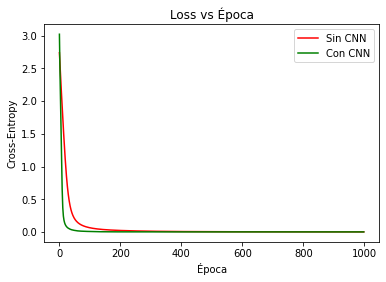

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(loss_list_sin_cnn,'r')
plt.plot(loss_list_con_cnn,'g')
plt.legend(['Sin CNN','Con CNN'])
plt.title("Loss vs Época")
plt.ylabel('Cross-Entropy')
plt.xlabel('Época')
plt.show()


#### Comente los resultados aquí (0,5 puntos)

``En general ambos modelos tuvieron un buen compartamiento, sin embargo la red con redes convolucionales alcanzo un menor Loss y redujo su error en un número menor de épocas, lo cual tiene sentido debido a que la capa de convolución permite centrarse solamente en las características que realmente si son importantes para la predicción. Además, se observa que si bien ambas redes obtienen un buen desempeño en la etapa de entrenamiento, tienen una mala capacidad de generalización pues al modificarse levemente algunas frases arrojan predicciones incorrectas ("Tell me about Mr Fbravo" vs "Tell me about mr Fbravo?"). Finalmente, estos resultados se pueden explicar en que las redes diseñadas no contenían capas de regularización, lo que inducía al sobreajuste y por lo tanto una mala capacidad de generalizar con datos fuera de muestra.``



